# Statistik

## Import af moduler

In [1]:
# Home made
import tools
# Python libs
from importlib import reload
import numpy as np
import pandas as pd
from copy import copy
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid", palette="pastel", color_codes=True)

## Udtrækning af prøve

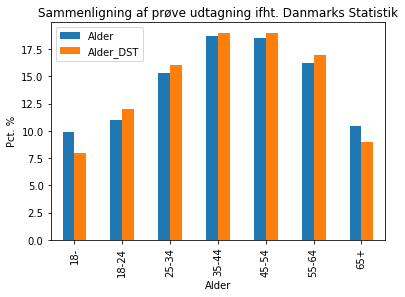

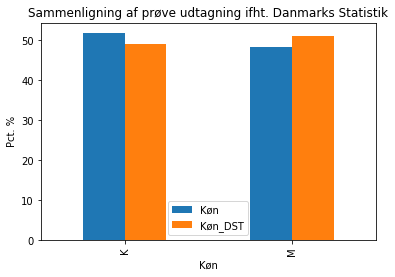

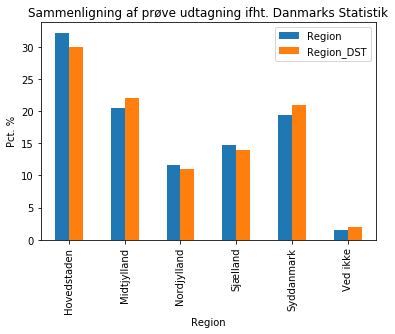

In [2]:
# Udtræk prøve
N = 1000
df, df_i = tools.get_std_sample(N=N)
# Sammenlign prøve
for key in df_i.keys():
    ax = df_i[key].plot.bar(title='Sammenligning af prøve udtagning ifht. Danmarks Statistik')
    ax.set_ylabel("Pct. %")
    #ax.legend(loc=2) 

plt.show()

## Se eksempel på den trukne prøve

In [3]:
print("Der er %i prøver"%len(df.index))
df.head()

Der er 1000 prøver


,Alder,Køn,Region,Alle,val
0,55-64,M,Hovedstaden,Alle,1.0
1,18-,M,Nordjylland,Alle,1.0
2,55-64,M,Hovedstaden,Alle,1.0
3,45-54,M,Nordjylland,Alle,1.0
4,18-24,K,Hovedstaden,Alle,1.0


# Anvendt notation
Den matematiske notation der efterfølgende anvendes, er taget fra *"An introduction to Error Analysis - The study of uncertainties in physical measurements"*, skrevet af John. R. Taylor. 

$$
\begin{aligned}
\text{Målt værdi af }x &= x_{\mathrm{bedste}} \pm \delta x \\
x_{\mathrm{bedste}} &= \text{bedste bud på }x = \text{gennemsnit af }x = \bar{x} = \frac{1}{N}\sum_{i=1}^N x_i \\
\delta x &= \text{absolut usikkerhed / absolut fejl / fejlmargen  af }x. \\
&\quad \text{Justeres så 95% af målinger falder indenfor } x_{\mathrm{bedste}} \pm \delta x \\
\epsilon_x &= \text{relativ usikkerhed / præcision af }x. \epsilon_x= \frac{\delta x}{|x_{\mathrm{bedste}}|} \text{ eller } \epsilon_x= \frac{\sigma_x}{|\bar{x}|}\\
&\quad \text{Læg mærke til at relativ usikkerhed ikke har en enhed.} \\
Var(x) &= \sigma_x^2 = \text{varians af } x = \frac{1}{N-1}\sum(x_i - \bar{x})^2 \\
\sigma_x &= \text{standardarvigelse / spredning af } x = \sqrt{Var(x)} = \sqrt{\sigma_x^2}
\end{aligned} \\
$$

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/440px-Boxplot_vs_PDF.svg.png)

# Lav data til at teste

In [4]:
# Lav en serie. Her er højde på 180 cm, med en relativ usikkerhed på 5%
s = tools.create_rand_series(df=df, x_avg=180, ex=0.05)
df.loc[s.index, 'val'] = s

Hvis den relative usikkerhed er 5%, hvad er så den absolutte usikkerhed hvis gennemsnittet er 180 cm?

## Plot af histogram af datapunkter og normalfordeling

Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=179.99, $\sigma_x$=8.8

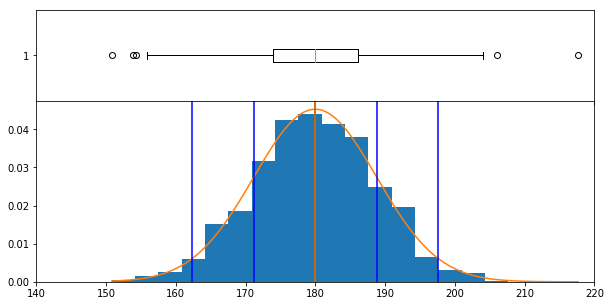

In [5]:
#reload(tools)
f, ax1, ax2, mean, sigma = tools.create_boxplot_hist(df=df, col='val')

ax1.set_xlim(180-40, 180+40)
#ax2.set_xlim(180-40, 180+40)
display(Markdown('Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=%1.2f, $\sigma_x$=%1.1f'%(mean, sigma)))

## Lav boxplots

Text(0.5,0.98,'Boxplot af kategorier sammen med hele prøven')

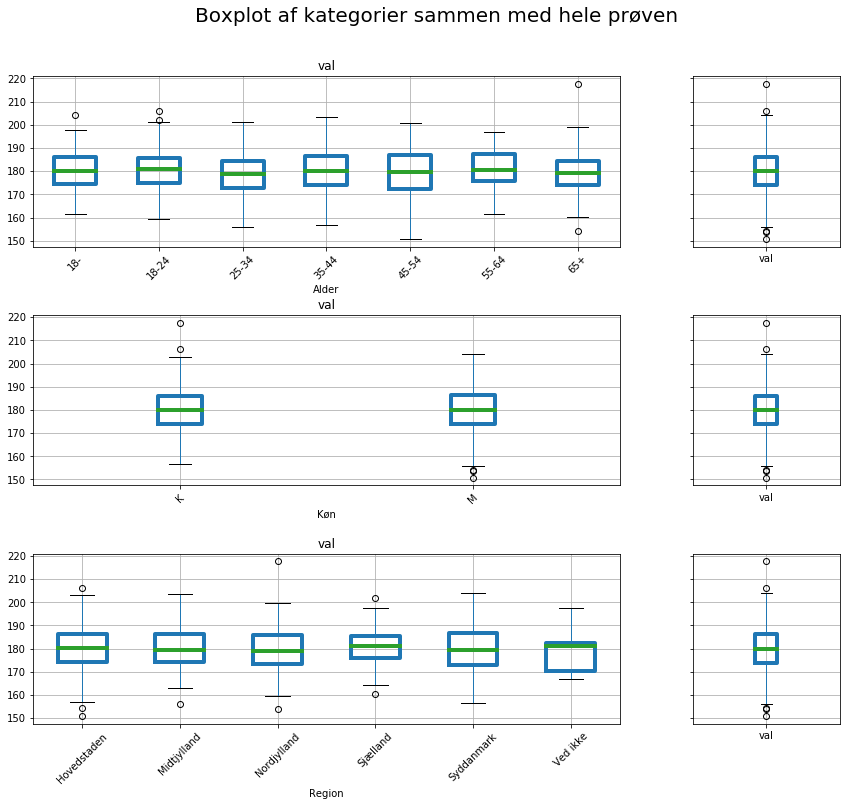

In [6]:
f, axes = plt.subplots(3,2, figsize=(14,12), sharey=True, gridspec_kw={'width_ratios': [4, 1]})
boxprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)
f.subplots_adjust(hspace=0.4)

for i, key in enumerate(df_i.keys()):
    ax = axes[i][0]
    ax2 = axes[i][1]
    df.boxplot(column='val', by=key, ax=ax, rot=45, boxprops=boxprops, medianprops=medianprops)
    df.boxplot(column='val', ax=ax2, boxprops=boxprops, medianprops=medianprops)
    #ax.set_title(key)
    
f.suptitle('Boxplot af kategorier sammen med hele prøven', size=20)

## Lav nye værdier

In [7]:
# Lave en kopi
df2 = copy(df)
# Vælg Midtjylland
df2_mj = df[df['Region'] == "Midtjylland"]
# Lav en serie. Her er højde på 190 cm, med en relativ usikkerhed på 5%
s = tools.create_rand_series(df=df2_mj, x_avg=200, ex=0.05)
df2.loc[s.index, 'val'] = s

Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=184.16, $\sigma_x$=12.3

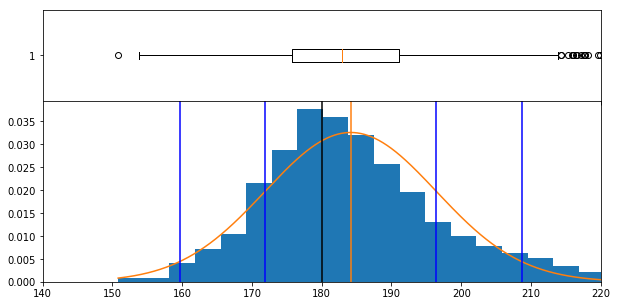

In [8]:
#reload(tools)
f, ax1, ax2, mean, sigma = tools.create_boxplot_hist(df=df2, col='val')

ax1.set_xlim(180-40, 180+40)
ax2.set_xlim(180-40, 180+40)
display(Markdown('Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=%1.2f, $\sigma_x$=%1.1f'%(mean, sigma)))

Text(0.5,0.98,'Boxplot af kategorier sammen med hele prøven')

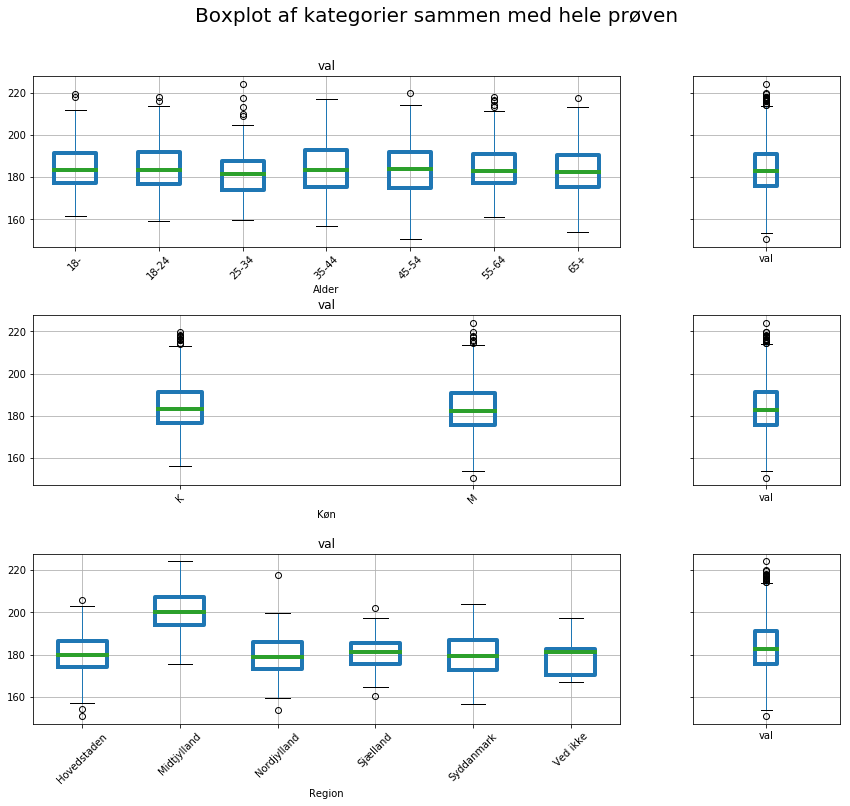

In [9]:
f, axes = plt.subplots(3,2, figsize=(14,12), sharey=True, gridspec_kw={'width_ratios': [4, 1]})
boxprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)
f.subplots_adjust(hspace=0.4)

for i, key in enumerate(df_i.keys()):
    ax = axes[i][0]
    ax2 = axes[i][1]
    df2.boxplot(column='val', by=key, ax=ax, rot=45, boxprops=boxprops, medianprops=medianprops)
    df2.boxplot(column='val', ax=ax2, boxprops=boxprops, medianprops=medianprops)
    #ax.set_title("")

f.suptitle('Boxplot af kategorier sammen med hele prøven', size=20)

# Andre plots

## Violin plot

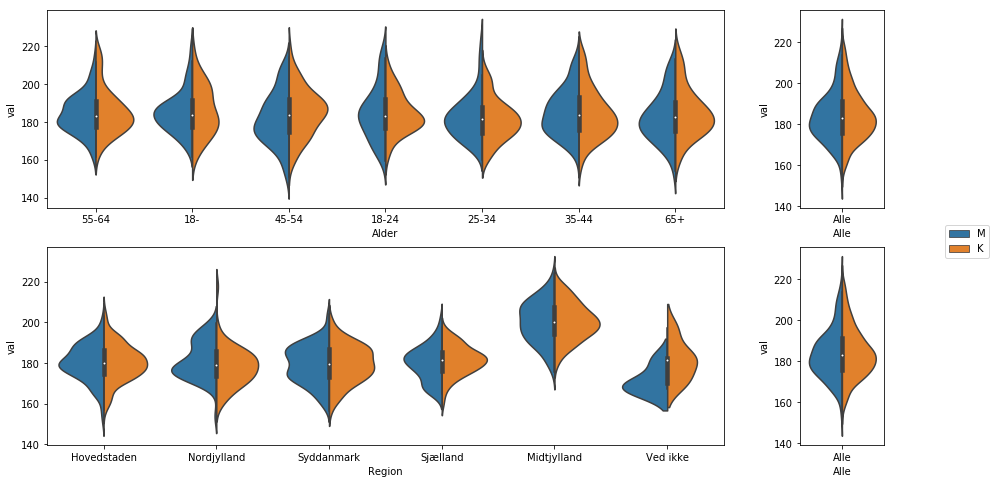

In [10]:
# Set up the matplotlib figure
f, axes = plt.subplots(2,2, figsize=(15,8), gridspec_kw={'width_ratios': [8, 1]})
sns.violinplot(x='Alder', y="val", hue="Køn", data=df2, split=True, ax=axes[0][0])
sns.violinplot(x='Alle', y="val", hue="Køn", data=df2, split=True, ax=axes[0][1])
sns.violinplot(x="Region", y="val", hue="Køn", data=df2, split=True, ax=axes[1][0])
sns.violinplot(x="Alle", y="val", hue="Køn", data=df2, split=True, ax=axes[1][1])
#sns.despine(left=True)
axes[0][0].legend_.remove()
axes[1][0].legend_.remove()
axes[0][1].legend_.remove()
axes[1][1].legend_.remove()

f.legend(loc=5)

## Boxplot grupperet

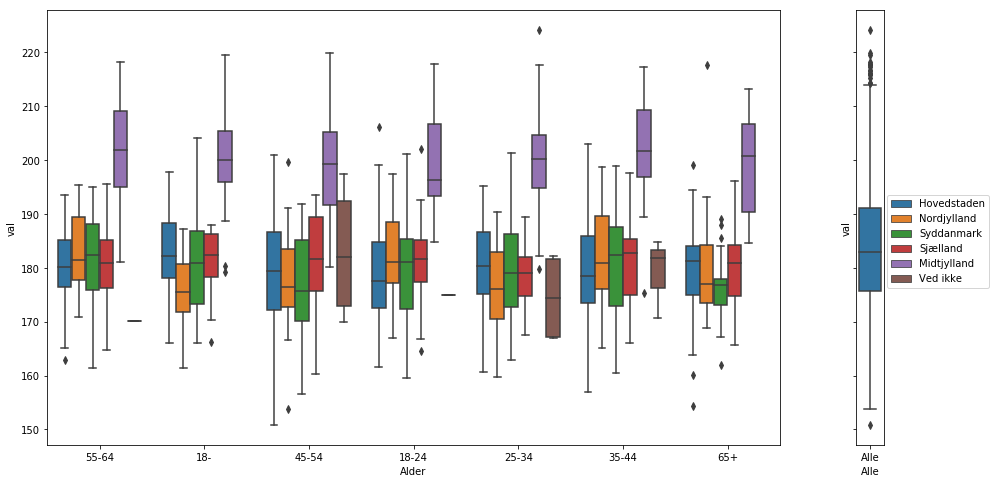

In [11]:
f, axes = plt.subplots(1,2, figsize=(15,8), sharey=True, gridspec_kw={'width_ratios': [26, 1]})
sns.boxplot(x='Alder', y="val", hue="Region", data=df2, ax=axes[0])#, palette="PRGn")
sns.boxplot(x='Alle', y="val", data=df2, ax=axes[1])#, palette="PRGn")
axes[0].legend_.remove()

f.legend(loc=5) 

## Facetgrid af histogrammer per kategori

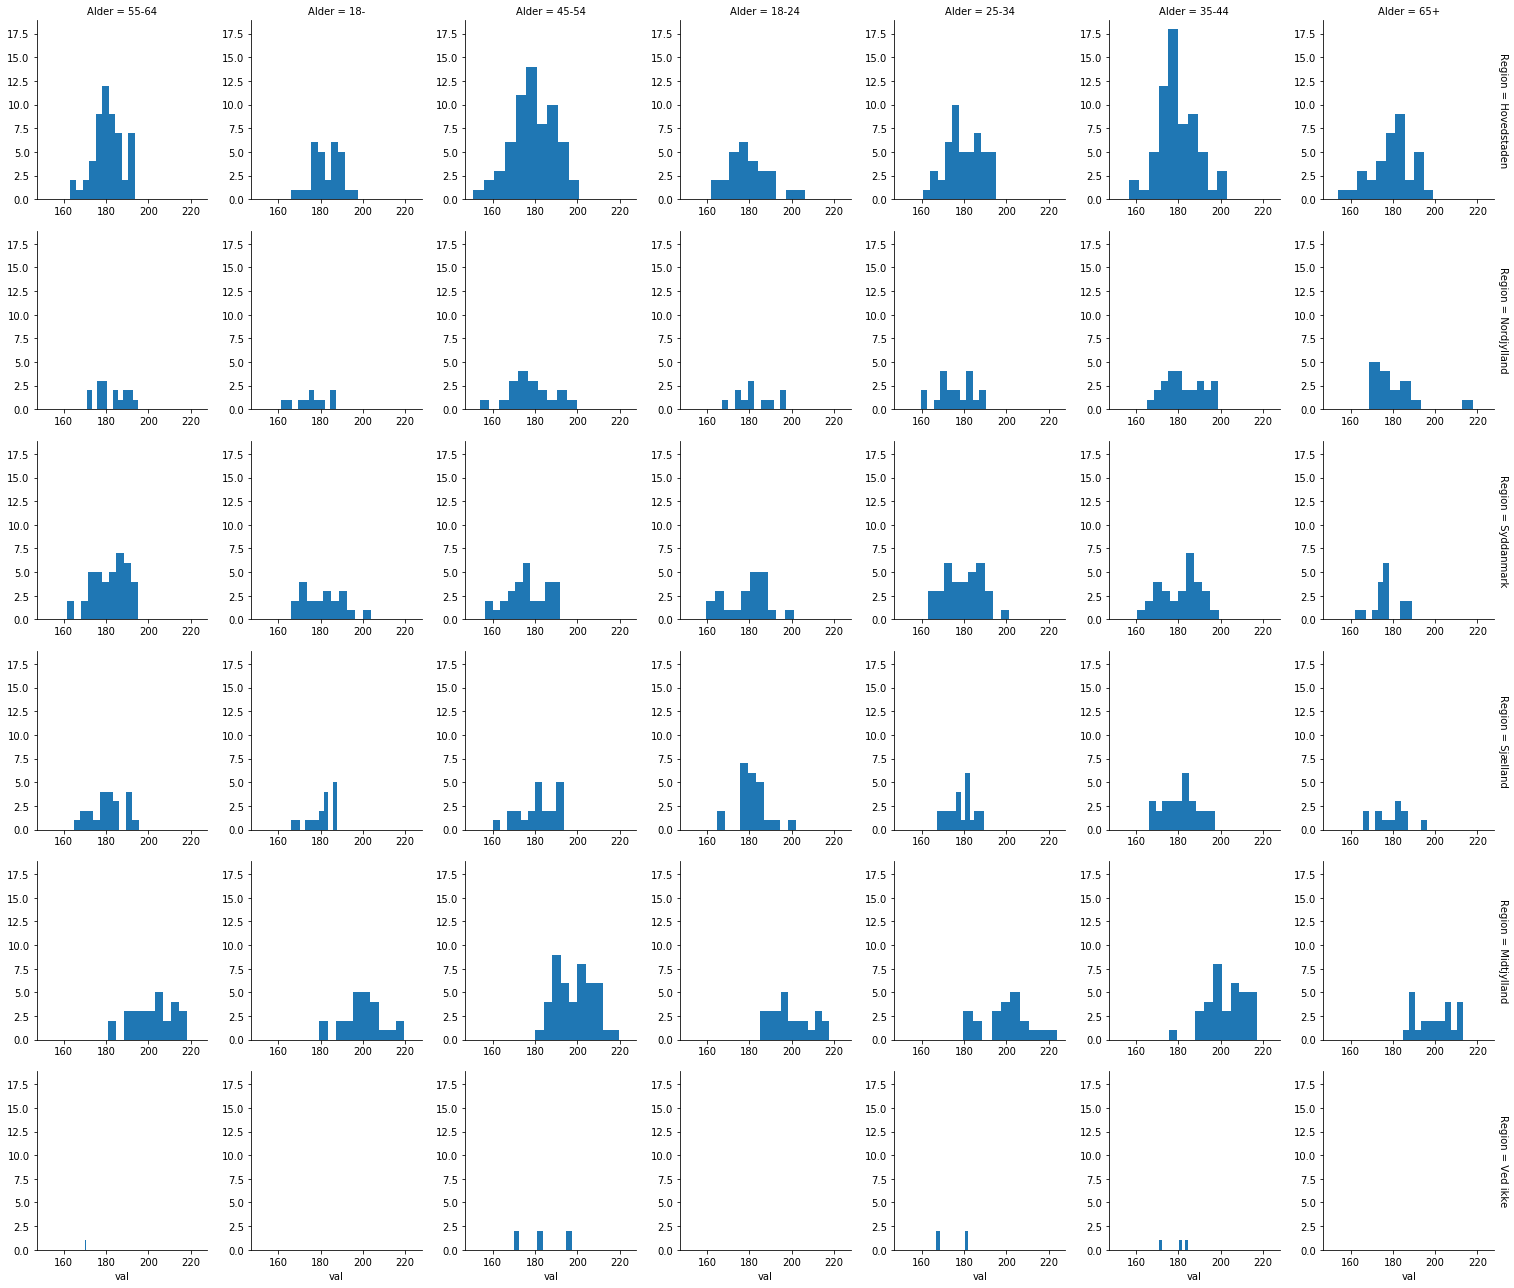

In [12]:
g = sns.FacetGrid(df2, col="Alder",  row="Region", margin_titles=True)
g = g.map(plt.hist, "val")
#g = g.map(sns.kdeplot,"val")

Means

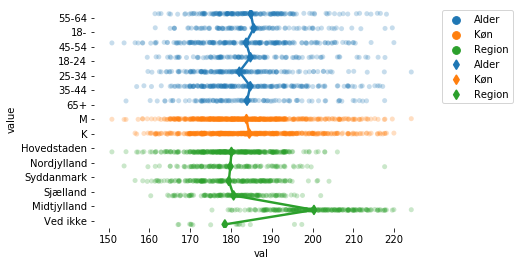

In [13]:
# "Melt" the dataset to "long-form" or "tidy" representation
df2_melt = pd.melt(df2[['Alder', 'Køn', 'Region', 'val']], "val", var_name="val_var")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
# Show each observation with a scatterplot
sns.stripplot(x='val', hue="val_var", y='value', data=df2_melt, ax=ax, dodge=True, jitter=True, alpha=.25)
# Show the conditional means
sns.pointplot(x='val', hue="val_var", y='value', data=df2_melt, ax=ax, dodge=.532, join=True, markers="d", scale=.9, ci=None)

ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

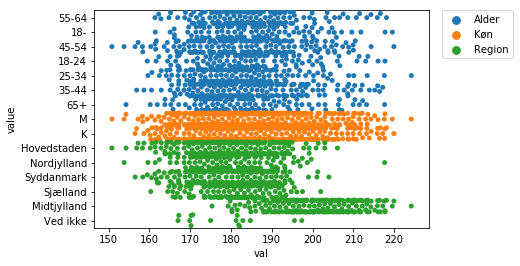

In [14]:
# Draw a categorical scatterplot to show each observation
f, ax = plt.subplots()
sns.swarmplot(x='val', hue="val_var", y='value', ax=ax, data=df2_melt)
ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

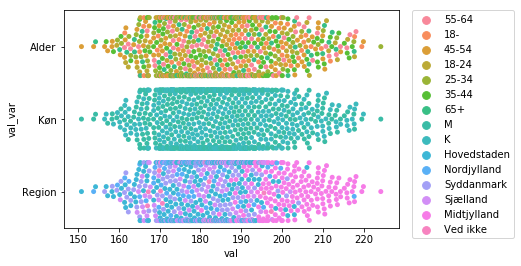

In [15]:
# Draw a categorical scatterplot to show each observation
f, ax = plt.subplots()
sns.swarmplot(x='val', y="val_var", hue='value', ax=ax, data=df2_melt)
ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)